In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [2]:
aiid_data = pd.read_csv("aiid_data_pull_20231213.csv")
aiid_data.head(3)

,id,title,description,date,alleged_deployer_of_ai_system,alleged_developer_of_ai_system,alleged_harmed_or_nearly_harmed_parties
0,Incident 1,Google’s YouTube Kids App Presents Inappropria...,YouTube’s content filtering and recommendation...,5/19/15,YouTube,YouTube,Children
1,Incident 2,Warehouse robot ruptures can of bear spray and...,Twenty-four Amazon workers in New Jersey were ...,12/5/18,Amazon,Amazon,Warehouse Workers
2,Incident 3,Crashes with Maneuvering Characteristics Augme...,"A Boeing 737 crashed into the sea, killing 189...",10/27/18,Boeing,Boeing,"Airplane Passengers, Airplane Crew"


In [3]:
aiid_data.dtypes

id                                         object
title                                      object
description                                object
date                                       object
alleged_deployer_of_ai_system              object
alleged_developer_of_ai_system             object
alleged_harmed_or_nearly_harmed_parties    object
dtype: object

In [4]:
aiid_data['alleged_deployer_of_ai_system'].value_counts()

alleged_deployer_of_ai_system
Tesla                                            38
Facebook                                         36
Google                                           28
unknown                                          22
Amazon                                           21
                                                 ..
Pasco Sheriff's Office                            1
unnamed Australian telecommunications company     1
Estée Lauder                                      1
Naver                                             1
The Arena Group, Sports Illustrated               1
Name: count, Length: 351, dtype: int64

In [5]:
aiid_data['alleged_developer_of_ai_system'].value_counts()

alleged_developer_of_ai_system
unknown                                                                  86
Tesla                                                                    42
Facebook                                                                 36
OpenAI                                                                   27
Google                                                                   27
                                                                         ..
Sarawak Information Systems                                               1
Airbnb, Trooly                                                            1
SecurOS                                                                   1
Spanish Secretary of State for Security, Spanish Ministry of Interior     1
Google Bard                                                               1
Name: count, Length: 266, dtype: int64

In [6]:
aiid_data['alleged_harmed_or_nearly_harmed_parties'].value_counts()

alleged_harmed_or_nearly_harmed_parties
Facebook users                                                           7
Tesla drivers                                                            6
Women, Minority Groups                                                   5
unknown                                                                  4
Microsoft                                                                4
                                                                        ..
Facebook content moderators                                              1
Black students                                                           1
XPeng Motors customers                                                   1
Indian voters, Indian social media users, Indian women journalists       1
General public, Readers of Sports Illustrated, Journalistic integrity    1
Name: count, Length: 553, dtype: int64

In [7]:
# convert type of date field
aiid_data['date'] = aiid_data['date'].astype('datetime64[ns]')
aiid_data.dtypes

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_20704/2921060104.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aiid_data['date'] = aiid_data['date'].astype('datetime64[ns]')


id                                                 object
title                                              object
description                                        object
date                                       datetime64[ns]
alleged_deployer_of_ai_system                      object
alleged_developer_of_ai_system                     object
alleged_harmed_or_nearly_harmed_parties            object
dtype: object

In [8]:
# add day, month, and year to data
datetimes = pd.to_datetime(aiid_data['date'])

aiid_data['day'] = datetimes.dt.day
aiid_data['month'] = datetimes.dt.month
aiid_data['year'] = datetimes.dt.year

aiid_data.head(2)

,id,title,description,date,alleged_deployer_of_ai_system,alleged_developer_of_ai_system,alleged_harmed_or_nearly_harmed_parties,day,month,year
0,Incident 1,Google’s YouTube Kids App Presents Inappropria...,YouTube’s content filtering and recommendation...,2015-05-19,YouTube,YouTube,Children,19,5,2015
1,Incident 2,Warehouse robot ruptures can of bear spray and...,Twenty-four Amazon workers in New Jersey were ...,2018-12-05,Amazon,Amazon,Warehouse Workers,5,12,2018


In [9]:
# top 5 years of incident count
aiid_data['year'].value_counts().head(5)

year
2023    114
2022     93
2020     82
2021     71
2017     48
Name: count, dtype: int64

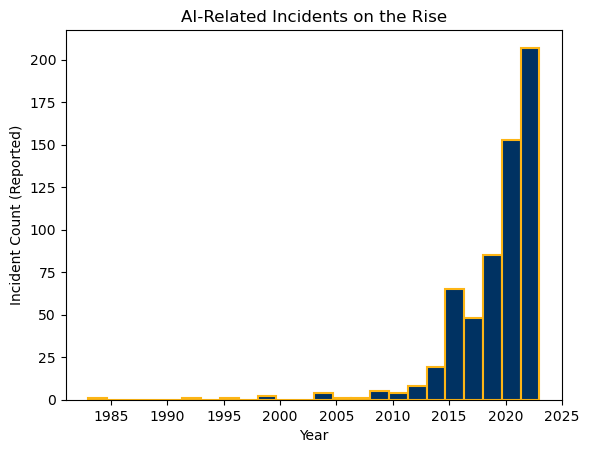

In [24]:
bar_color = '#003262'
outline_color = '#FDB515'

plt.hist(aiid_data['year'],
         bins=len(aiid_data['year'].unique()),
         color=bar_color,      # Set the hex color for bars
         edgecolor=outline_color,  # Set the hex color for bar outlines
         linewidth=1.5)       # Adjust the linewidth as needed

plt.title('AI-Related Incidents on the Rise')
plt.xlabel('Year')
plt.ylabel('Incident Count (Reported)')
plt.show()

In [11]:
# explore 522
print(f'**Title**: {aiid_data["title"][522]}')
print(f"**Description**: {aiid_data['description'][522]}")
print(f"**Deployer**: {aiid_data['alleged_deployer_of_ai_system'][522]}")
print(f"**Developer**: {aiid_data['alleged_developer_of_ai_system'][522]}")
print(f"**Date**: {aiid_data['date'][522]}")
print(f"**Victim(s)**: {aiid_data['alleged_harmed_or_nearly_harmed_parties'][522]}")

**Title**: Tesla FSD Misidentified Truck Hauling Traffic Lights as Trail of Traffic Lights
**Description**: A Tesla driver posted on Twitter his Tesla FSD's "glitch," misidentifying deactivated traffic lights being carried by a truck as a constant trail of traffic lights while traveling at high speed on a highway.
**Deployer**: Tesla
**Developer**: Tesla
**Date**: 2021-06-02 00:00:00
**Victim(s)**: Tesla drivers


In [12]:
aiid_data.sort_values(by = 'date', ascending = False).head(2)

,id,title,description,date,alleged_deployer_of_ai_system,alleged_developer_of_ai_system,alleged_harmed_or_nearly_harmed_parties,day,month,year
604,Incident 616,Sports Illustrated Is Alleged to Have Used AI ...,"Sports Illustrated, managed by The Arena Group...",2023-11-27,"The Arena Group, Sports Illustrated",unknown,"General public, Readers of Sports Illustrated,...",27,11,2023
601,Incident 613,AI-Generated Images Available through Adobe St...,AI-generated images available through Adobe St...,2023-11-23,Adobe Stock,Various AI image generators,"General public, Journalistic integrity, News s...",23,11,2023


In [13]:
aiid_data['alleged_harmed_or_nearly_harmed_parties'] = aiid_data['alleged_harmed_or_nearly_harmed_parties'].str.replace(', ', ',').str.strip()

In [14]:
aiid_data['alleged_harmed_or_nearly_harmed_parties'] = aiid_data['alleged_harmed_or_nearly_harmed_parties'].str.lower()

In [15]:
### Split the values in the 'alleged_harmed_or_nearly_harmed_parties' column
# and stack them into a new DataFrame
harmed_party_counts = aiid_data['alleged_harmed_or_nearly_harmed_parties'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

# Rename the resulting Series to 'alleged_harmed_or_nearly_harmed_party'
harmed_party_counts.name = 'alleged_harmed_or_nearly_harmed_party'

# Count the occurrences of each party
harmed_party_occurrences = harmed_party_counts.value_counts()

# Display the result
harmed_party_occurrences_df = pd.DataFrame(harmed_party_occurrences).reset_index()
harmed_party_occurrences_df.head(35)

,alleged_harmed_or_nearly_harmed_party,count
0,facebook users,28
1,general public,24
2,tesla drivers,20
3,twitter users,15
4,minority groups,12
5,women,12
6,tiktok users,10
7,microsoft,8
8,youtube users,8
9,pedestrians,7


In [16]:
aiid_data.columns

Index(['id', 'title', 'description', 'date', 'alleged_deployer_of_ai_system',
       'alleged_developer_of_ai_system',
       'alleged_harmed_or_nearly_harmed_parties', 'day', 'month', 'year'],
      dtype='object')

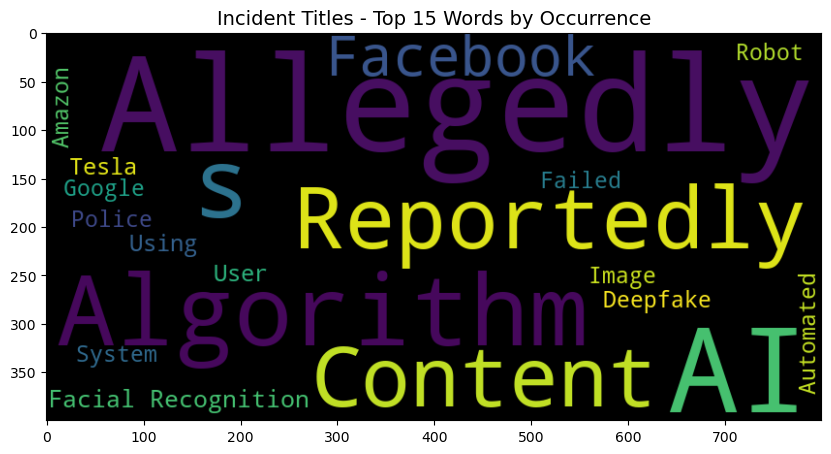

In [17]:
plt.figure(figsize = (10,10))
wc_title = WordCloud(
    max_words = 20,
    width = 800,
    height = 400).generate(" ".join(aiid_data['title']))
plt.imshow(wc_title , interpolation = 'bilinear')
plt.title('Incident Titles - Top 15 Words by Occurrence',fontsize=14);

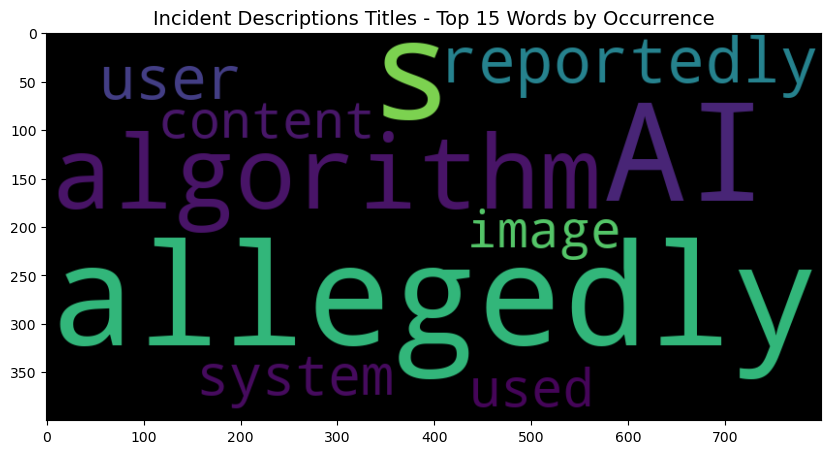

In [18]:
plt.figure(figsize = (10,10))
wc_description = WordCloud(
    max_words = 10,
    width = 800,
    height = 400).generate(" ".join(aiid_data['description']))
plt.imshow(wc_description , interpolation = 'bilinear')
plt.title('Incident Descriptions Titles - Top 15 Words by Occurrence',fontsize=14);

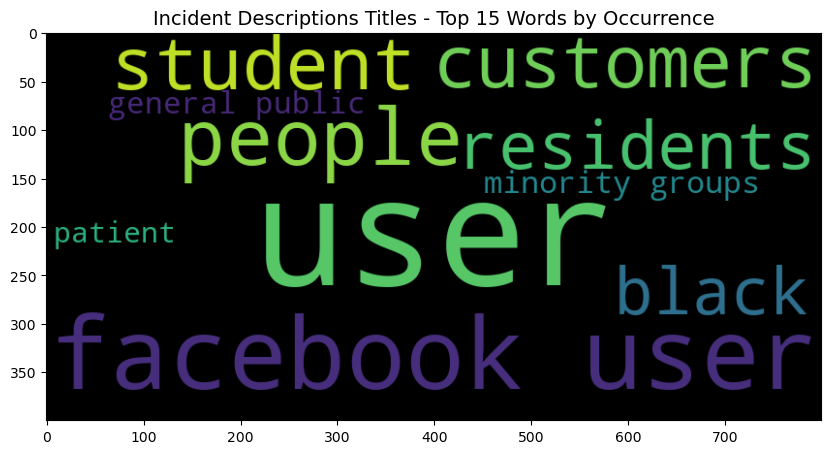

In [19]:
plt.figure(figsize = (10,10))
wc_harmed_parties = WordCloud(
    max_words = 10,
    width = 800,
    height = 400).generate(" ".join(aiid_data['alleged_harmed_or_nearly_harmed_parties']))
plt.imshow(wc_harmed_parties , interpolation = 'bilinear')
plt.title('Incident Descriptions Titles - Top 15 Words by Occurrence',fontsize=14);

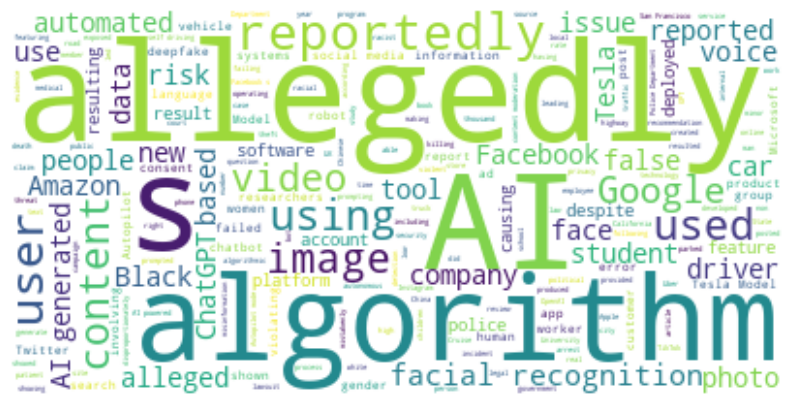

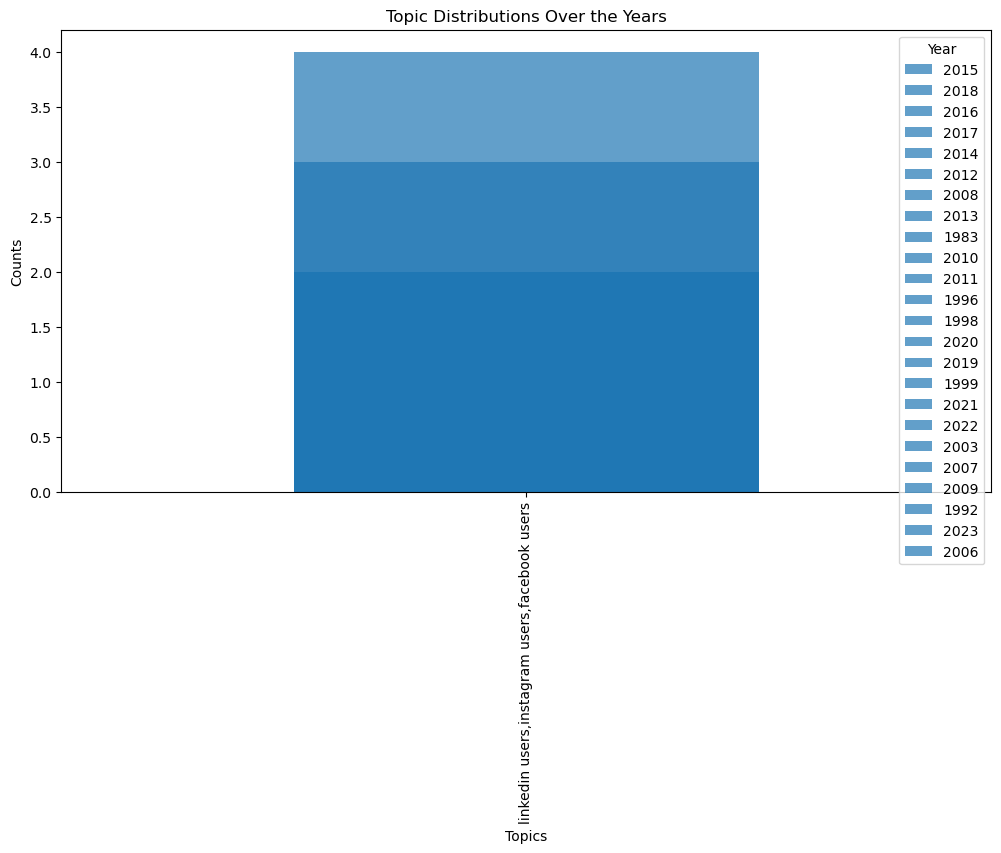

In [20]:
# Assuming aiid_data is your DataFrame
corpus = aiid_data['description']

# Function to generate and display a word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate a word cloud for the entire corpus
all_text = ' '.join(corpus)
generate_word_cloud(all_text)

# Visualize topic distributions over the years
plt.figure(figsize=(12, 6))
for year in aiid_data['year'].unique():
    subset = aiid_data[aiid_data['year'] == year]
    topics = subset['alleged_harmed_or_nearly_harmed_parties'].value_counts()
    topics.plot(kind='bar', stacked=True, label=str(year), alpha=0.7)

plt.title('Topic Distributions Over the Years')
plt.xlabel('Topics')
plt.ylabel('Counts')
plt.legend(title='Year')
plt.show()


<Figure size 1200x800 with 0 Axes>

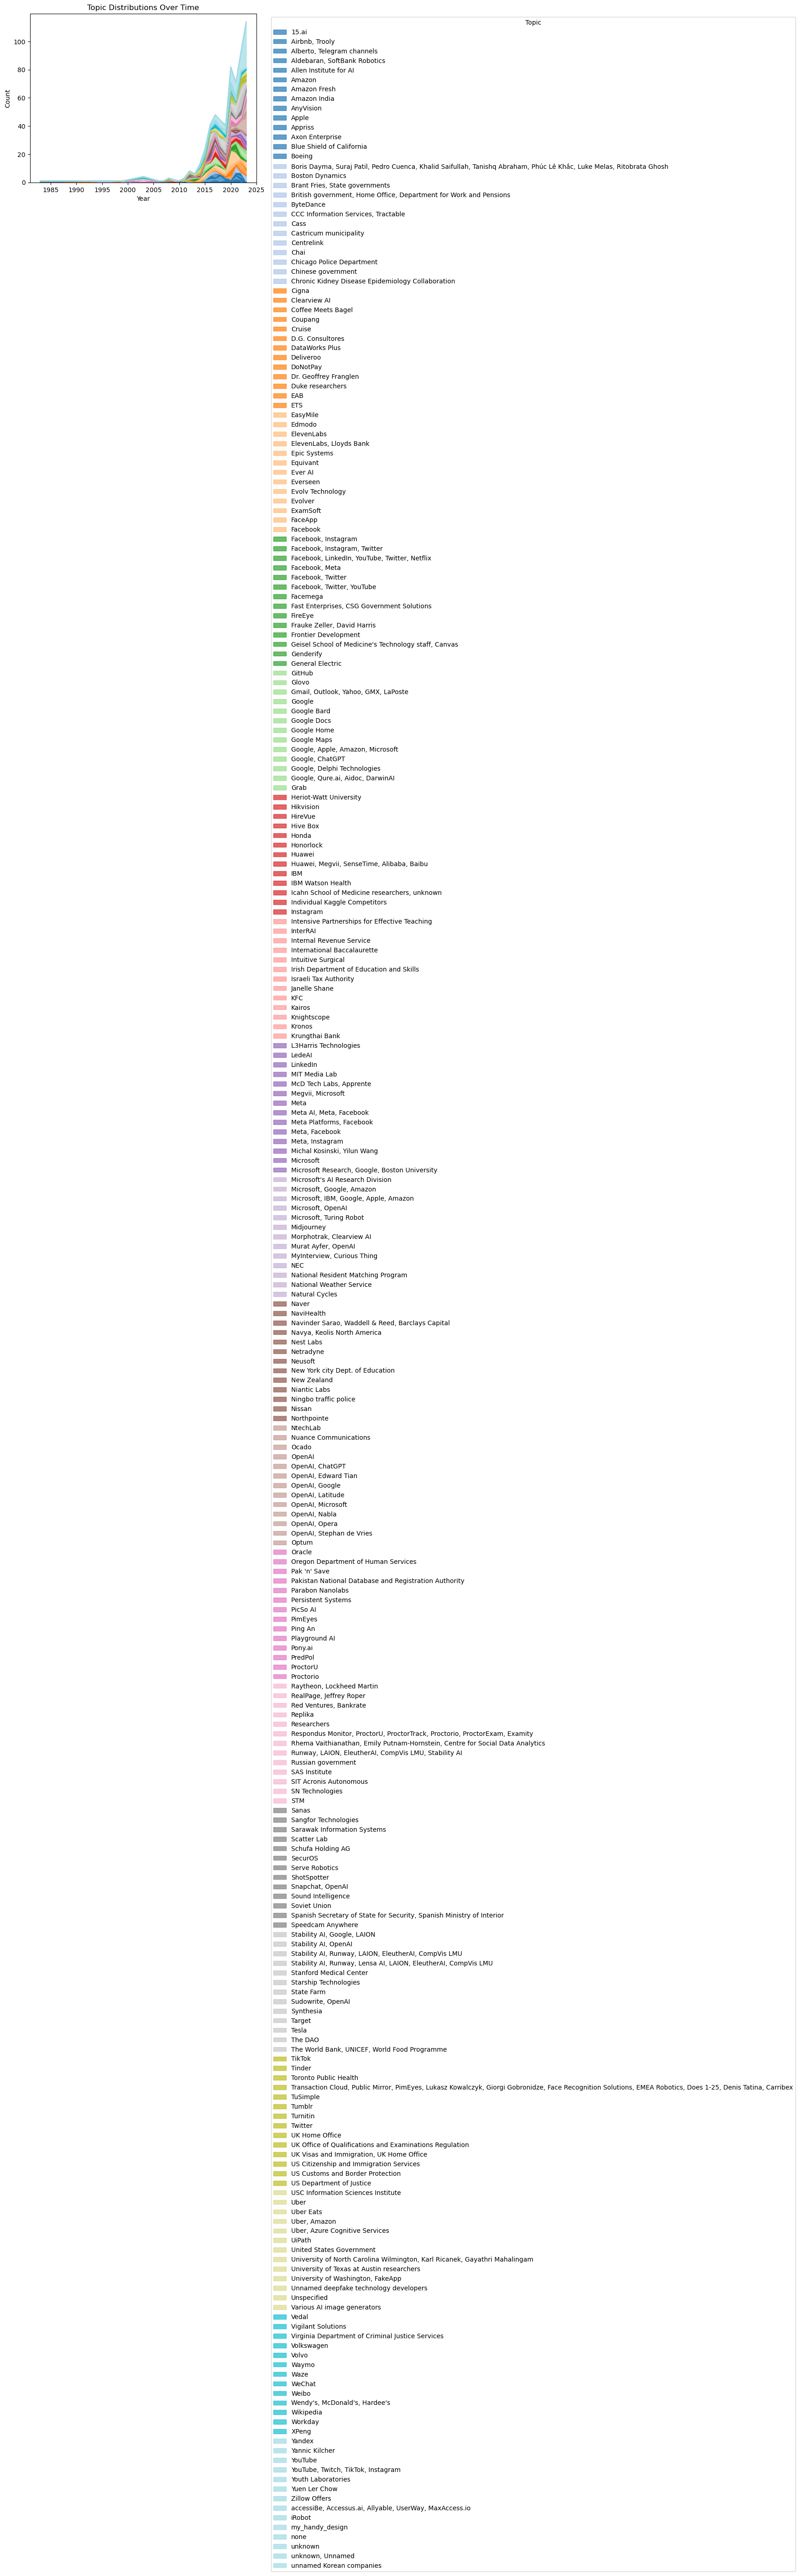

In [21]:
# Assuming aiid_data is your DataFrame
plt.figure(figsize=(12, 8))

# Create a DataFrame with counts of each topic for each year
topics_over_time = aiid_data.groupby(['year', 'alleged_developer_of_ai_system']).size().unstack(fill_value=0)

# Plot stacked area plot for topic distributions over time
topics_over_time.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.title('Topic Distributions Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


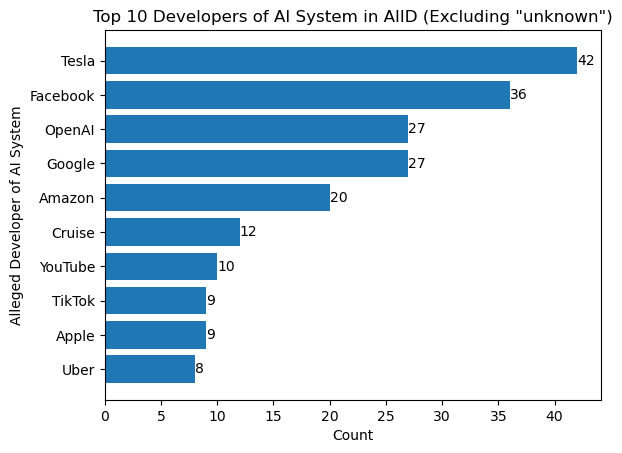

In [26]:
# Count occurrences of each unique value in the 'alleged_developer_of_ai_system' column
developer_counts = aiid_data['alleged_developer_of_ai_system'].value_counts()

# Drop the entry where the alleged developer is "unknown"
developer_counts = developer_counts.drop('unknown', errors='ignore')

# Select the top 10 values (including ties)
top_developers = developer_counts.head(10)

# Create a horizontal bar chart with the largest value at the top
plt.barh(top_developers.index[::-1], top_developers[::-1])

for index, value in zip(top_developers.index[::-1], top_developers[::-1]):
    plt.text(value, index, str(value), va='center')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Alleged Developer of AI System')
plt.title('Top 10 Developers of AI System in AIID (Excluding "unknown")')

# Display the plot
plt.show()

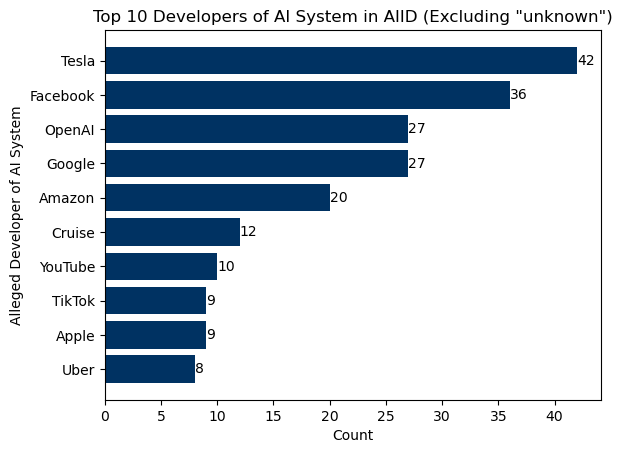

In [29]:
import matplotlib.pyplot as plt

# Assuming '003262' is the hex color for bars, and 'FDB515' is for outlines
bar_color = '#003262'

# Count occurrences of each unique value in the 'alleged_developer_of_ai_system' column
developer_counts = aiid_data['alleged_developer_of_ai_system'].value_counts()

# Drop the entry where the alleged developer is "unknown"
developer_counts = developer_counts.drop('unknown', errors='ignore')

# Select the top 10 values (including ties)
top_developers = developer_counts.head(10)

# Create a horizontal bar chart with the largest value at the top
plt.barh(top_developers.index[::-1],
         top_developers[::-1],
         color=bar_color)  # Set the hex color for bar outlines

for index, value in zip(top_developers.index[::-1], top_developers[::-1]):
    plt.text(value, index, str(value), va='center')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Alleged Developer of AI System')
plt.title('Top 10 Developers of AI System in AIID (Excluding "unknown")')

# Display the plot
plt.show()
